In [1]:
import pandas as pd
import prophet

c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df = pd.read_csv("Electric_Production (1).csv",
                index_col='DATE',
                parse_dates=True
)

In [ ]:
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [8]:
df.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

In [9]:
df.index.freq = "MS"

In [10]:
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


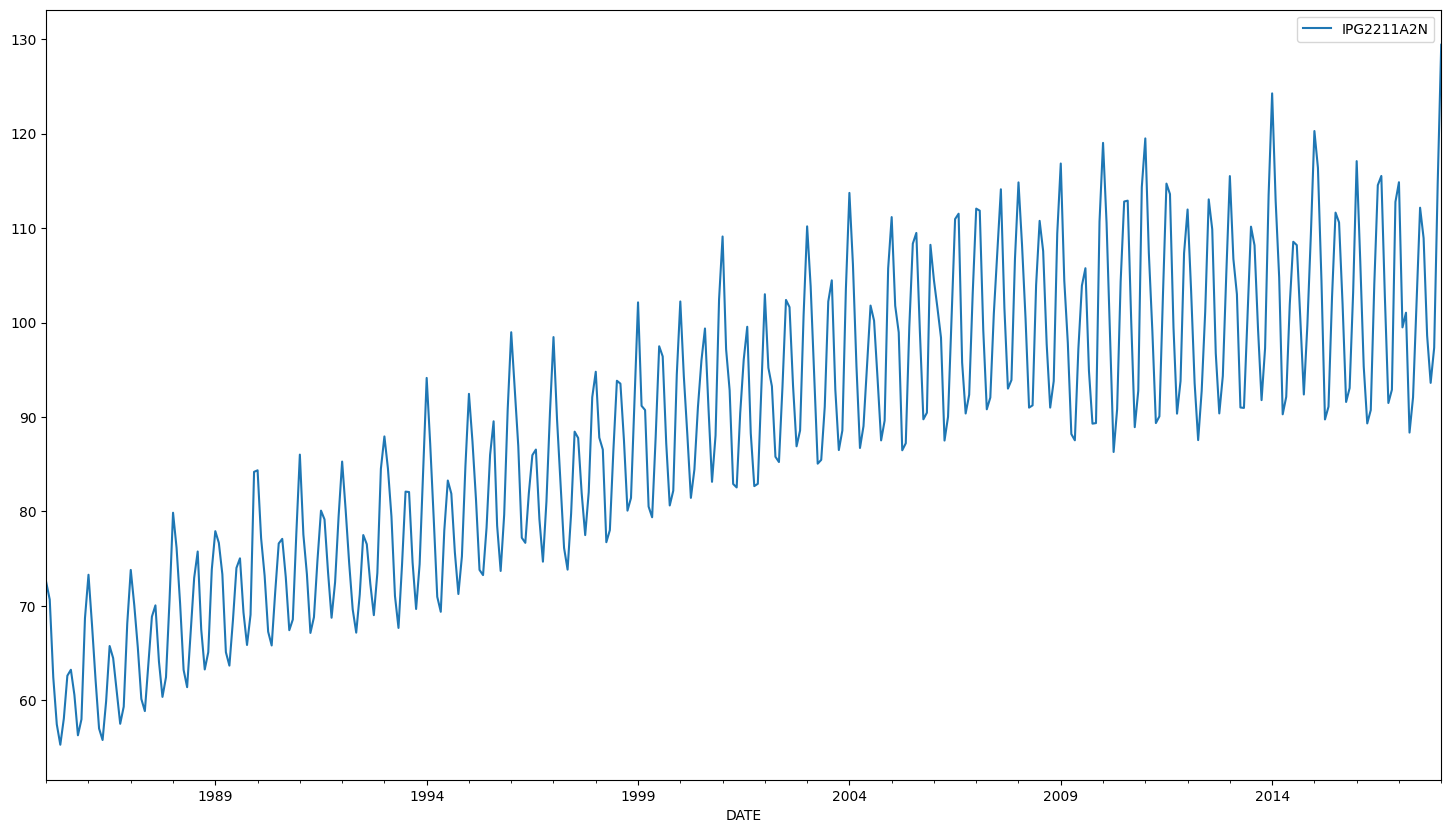

In [12]:
df.plot(figsize = (18,10));

In [14]:
df.shift(periods=1, freq="ME")

,IPG2211A2N
DATE,
1985-01-31,72.5052
1985-02-28,70.6720
1985-03-31,62.4502
1985-04-30,57.4714
1985-05-31,55.3151
...,...
2017-09-30,98.6154
2017-10-31,93.6137
2017-11-30,97.3359


In [15]:
df.shift(periods=1, freq="YE")

,IPG2211A2N
DATE,
1985-12-31,72.5052
1985-12-31,70.6720
1985-12-31,62.4502
1985-12-31,57.4714
1985-12-31,55.3151
...,...
2017-12-31,98.6154
2017-12-31,93.6137
2017-12-31,97.3359


In [17]:
import statsmodels.api as sm


In [18]:
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [21]:
result = sm.tsa.seasonal_decompose(df, model="moltiplicative")

df_component = (
    df.assign(
        trend = result.trend,
        seasonal = result.seasonal,
        residual = result.resid
    ).dropna()
)

In [22]:
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [23]:
df_component

,IPG2211A2N,trend,seasonal,residual
DATE,,,,
1985-07-01,62.6202,62.199021,1.066145,0.944310
1985-08-01,63.2485,62.120496,1.068081,0.953259
1985-09-01,60.5846,61.999113,0.971682,1.005664
1985-10-01,56.3154,61.971337,0.900691,1.008929
1985-11-01,58.0005,61.973842,0.933050,1.003041
...,...,...,...,...
2017-03-01,101.0396,101.407296,0.995985,1.000390
2017-04-01,88.3530,101.323075,0.896027,0.973177
2017-05-01,92.0805,101.596946,0.896724,1.010713


In [28]:
!pip install -U nbformat



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import plotly.express as px

fig = px.area(x=df.index, y=df["IPG2211A2N"], title="original time seires")
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'fillpattern': {'shape': ''},
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'stackgroup': '1',
              'type': 'scatter',
              'x': array(['1985-01-01T00:00:00.000000000', '1985-02-01T00:00:00.000000000',
                          '1985-03-01T00:00:00.000000000', ..., '2017-11-01T00:00:00.000000000',
                          '2017-12-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('HHxhMlUgUkBeukkMAqtRQGFUUiegOU' ... 'Zif1VYQAN4CyQorlxAdy0hH/QsYEA='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'original time seires'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [30]:
dff = df_component.melt(ignore_index=False)

In [31]:
dff

,variable,value
DATE,,
1985-07-01,IPG2211A2N,62.620200
1985-08-01,IPG2211A2N,63.248500
1985-09-01,IPG2211A2N,60.584600
1985-10-01,IPG2211A2N,56.315400
1985-11-01,IPG2211A2N,58.000500
...,...,...
2017-03-01,residual,1.000390
2017-04-01,residual,0.973177
2017-05-01,residual,1.010713


---

In [32]:
import pandas as pd
from prophet import Prophet
import joblib

In [36]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/monthly-milk-production-pounds.csv'

In [37]:
df1 = pd.read_csv(path)

In [38]:
df1

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [39]:
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [42]:
df = df.reset_index()

In [43]:
df

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [44]:
df.columns = ["ds", "y"]

In [45]:
df

,ds,y
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


<Axes: >

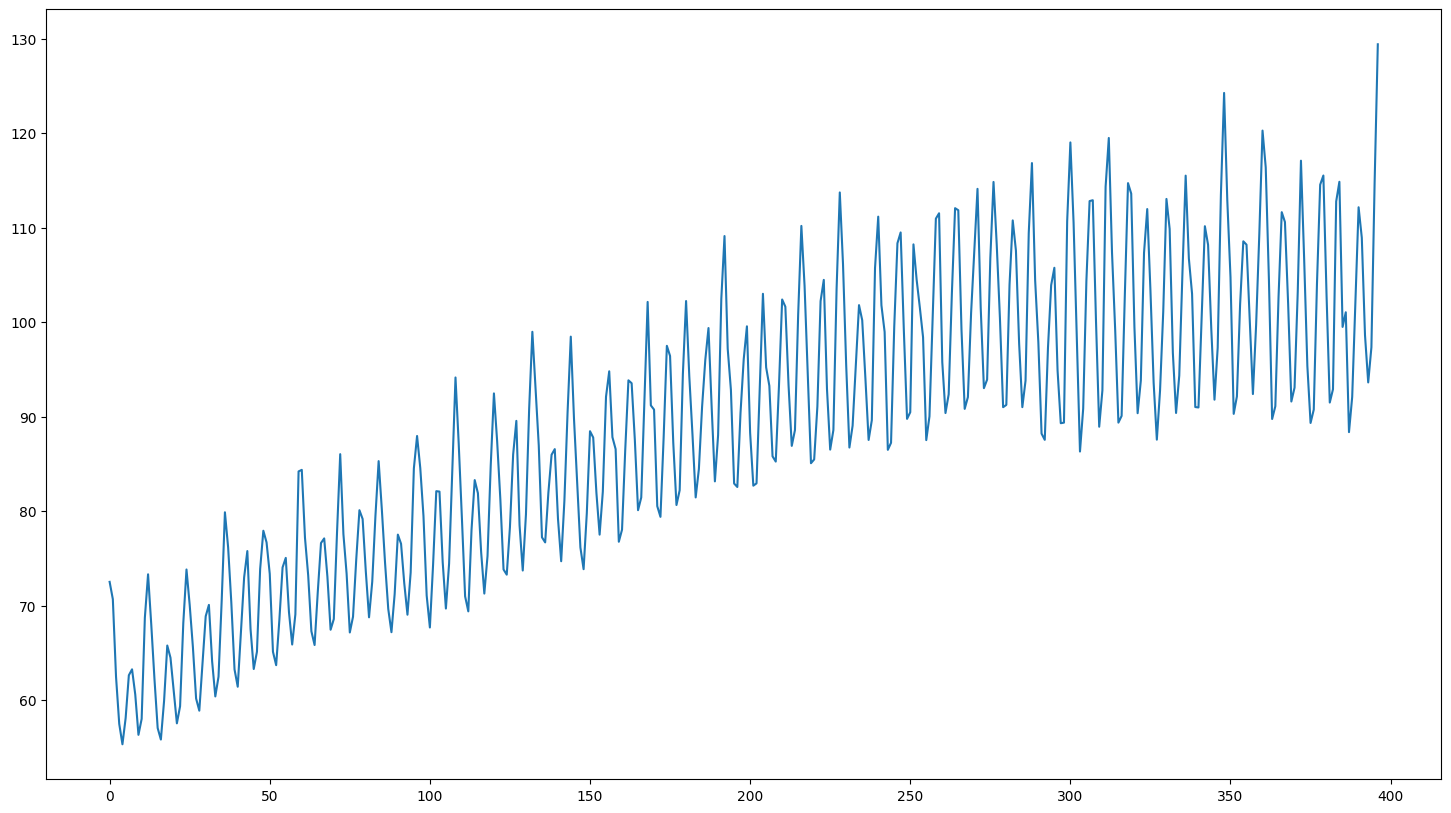

In [47]:
df["y"].plot(figsize=(18,10))

In [ ]:
df["ds"] = pd.to_datetime(df["ds"])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      397 non-null    datetime64[ns]
 1   y       397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [50]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [51]:
m=Prophet()
model = m.fit(df)

13:52:55 - cmdstanpy - INFO - Chain [1] start processing
13:52:55 - cmdstanpy - INFO - Chain [1] done processing
13:52:55 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
13:52:55 - cmdstanpy - INFO - Chain [1] start processing
13:52:55 - cmdstanpy - INFO - Chain [1] done processing
13:52:55 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=22897 data file=C:\Users\lucam\AppData\Local\Temp\tmpqym3dw_f\bt4s5w2v.json init=C:\Users\lucam\AppData\Local\Temp\tmpqym3dw_f\r1ahg9bp.json output file=C:\Users\lucam\AppData\Local\Temp\tmpqym3dw_f\prophet_model4eyhly0z\prophet_model-20250221135255.csv method=optimize algorithm=newton iter=10000' failed: 

In [52]:
model

NameError: name 'model' is not defined